<a href="https://colab.research.google.com/github/hamuntech/Telco-Customer-Churn-using-Logistic-Regression/blob/main/Telco_Customer_Churn_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/blastchar/telco-customer-churn

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
len(df)

7043

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.head().T #To see all columns on the single screen

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.dtypes #confirm that datatypes are encoded correctly by pandas. Note that TotalCharges column is incorrectly encoded as non-numeric

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Lets change TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
#Lets do some house keeping
df.columns = df.columns.str.lower().str.replace(' ', '_') #Column names to lowercase and replace spaces with underscore

string_columns = list(df.dtypes[df.dtypes == 'object'].index) #df.dtypes produces the output as depicted above. Note that column names are indices

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') #Column content to lowercase and replace spaces with underscore

In [ ]:
df.churn.isnull().sum() #Make sure there are no null values in the labels

0

In [ ]:
df.churn = (df.churn == 'yes').astype(int) #Encode the lables as 0 and 1

In [ ]:
#Lets see all the columns in a single page
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
#Split the dataset into train, validation and test sets
from sklearn.model_selection import train_test_split

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [ ]:
del df_train['churn']
del df_val['churn']

In [ ]:
#Check the distribution of examples of both types
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [ ]:
#Churn rate. Note that only 1's will be added but division will be carried out with the total number of examples
global_mean = round(df_train_full.churn.mean(), 3)
global_mean

0.27

In [ ]:
#Different type of variables in the dataset take different treatment, thus lets separate these
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
#Number of unique values in categorical features
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Feature Relevance in relation to the labels

In [ ]:
#Female customers churn rate
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

gender == female: 0.277


In [ ]:
#Male customers churn rate
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == male:   0.263


In [ ]:
female_mean / global_mean

1.0252742012398663

In [ ]:
male_mean / global_mean

0.9748649283533003

In [ ]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner == yes: 0.205


In [ ]:
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == no : 0.33


In [ ]:
partner_yes / global_mean

0.7593826246675986

In [ ]:
partner_no / global_mean

1.22151482997322

In [ ]:
#Another way to calculate the difference and ratio of means
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006824,1.025274
male,0.263214,-0.006786,0.974865


In [ ]:
#Lets apply the above technique to all categorical variables
from IPython.display import display #To display dataframe from within the loop

In [ ]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [ ]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
#Mutual info score between variables and the target label
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn) #Mutual info score is calculated for each variable in relation to "churn"

df_mi = df_train_full[categorical].apply(calculate_mi) #Apply the function calculate_mi to each categorical column of the dataset. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


In [ ]:
#Mutual information can be used between categorical variables, not numerical. Thus, we use "Pearson’s correlation coefficient" instead for numerical variables
#Correlation between churn and tenure/total charges is negative. One goes up, the other one goes down
#Correlation between churn and monthly charges is positive, one goes up, so does the other one
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [ ]:
df_train_full.groupby(by='churn')[numerical].mean() #These numbers confirm the correlation figures above

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


In [ ]:
#Note that the examples of original values in the categorical variables are male/female for gender, yes/no for online security, one year/two year/monthly for contract. We need to transform these into numbers using one-hot encoding. 
from sklearn.feature_extraction import DictVectorizer

In [ ]:
df_train.shape #Number of columns before one-hot encoding = 20

(3774, 20)

In [ ]:
train_dict = df_train[categorical + numerical].to_dict(orient='records') #DictVectorizer will only transform categorical variables and numerical ones will be left untouched

In [ ]:
train_dict[0]

{'contract': 'two_year',
 'dependents': 'no',
 'deviceprotection': 'yes',
 'gender': 'male',
 'internetservice': 'dsl',
 'monthlycharges': 86.1,
 'multiplelines': 'no',
 'onlinebackup': 'yes',
 'onlinesecurity': 'yes',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'yes',
 'tenure': 71,
 'totalcharges': 6045.9}

In [ ]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)

In [ ]:
X_train = dv.transform(train_dict)

In [ ]:
X_train.shape #Number of columns after one-hot encoding = 45

(3774, 45)

In [ ]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

Training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Train the model
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#One-hot encoding of validation dataset. NOTE THAT WE TRAIN DictVectorizer ONLY ONCE ON TRAINING DATA FOR ONE-HOT ENCODING AND THEN USE IT TO TRANSFORM THE TRAINING, VALIDATION AND TEST DATASETS
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
#Evaluate the model using validation dataset
model.predict_proba(X_val)

array([[0.76508784, 0.23491216],
       [0.73113015, 0.26886985],
       [0.68054704, 0.31945296],
       ...,
       [0.94274614, 0.05725386],
       [0.38476895, 0.61523105],
       [0.93872763, 0.06127237]])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1] #Probablities are retuned in 2 columns, first for churn =0 and second for churn - 1. We take only the second column into account here as we are interested in finding out the probability of a customer churning

In [ ]:
y_pred

array([0.23491216, 0.26886985, 0.31945296, ..., 0.05725386, 0.61523105,
       0.06127237])

In [ ]:
#If the probability of churning (second column in prediciton as indicated above) is greater than 0.5, we consider that the customer has likelihood of churning
churn = y_pred > 0.5

In [ ]:
(y_val == churn).mean() #Calculation of accuracy

0.8016129032258065

Interpreting the model

In [ ]:
#Model intercept. FIRST WEIGHT IS ALWAYS THE INTERCEPT / BIAS
model.intercept_[0]

-0.12198896163060387

In [ ]:
#The rest of model weights
model.coef_[0]

array([ 5.63350419e-01, -8.59198889e-02, -5.99419491e-01, -3.02820218e-02,
       -9.17069398e-02,  9.99283340e-02, -1.15868311e-01, -1.06048985e-01,
       -2.73676855e-02, -9.46212762e-02, -3.23348965e-01,  3.17228314e-01,
       -1.15868311e-01,  7.84317450e-04, -1.68096778e-01,  1.27134010e-01,
       -8.10261944e-02,  1.35706167e-01, -1.15868311e-01, -1.41826818e-01,
        2.57861725e-01, -1.15868311e-01, -2.63982375e-01, -2.12615137e-01,
        9.06261753e-02, -4.80303106e-02, -7.39586510e-02, -2.66766308e-02,
       -1.36245780e-01,  1.74748490e-01, -1.33815041e-01,  1.27134010e-01,
       -2.49122972e-01,  2.97090535e-01, -8.48662760e-02, -1.15868311e-01,
        7.87456252e-02, -9.90818957e-02, -1.15868311e-01,  9.29612449e-02,
        1.78141046e-01, -1.15868311e-01, -1.84261697e-01, -6.94862417e-02,
        4.47681302e-04])

In [ ]:
#Map feature names with the weights
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


In [ ]:
#To understand the model, lets build a model based on subset of features
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'tenure',
 'totalcharges']

In [ ]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train) #Notice that y_train stays the same for x_small_train as the labels don't change

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_small.intercept_[0] #Just based on this value, the customer will not churn becasue the activation function will switch -0.63 to 0. Negative sign shows class imbalance tilting in favor of 0 (not churning)

-0.6387618613273348

In [ ]:
dict(zip(dv_small.get_feature_names(), model_small.coef_[0].round(3))) #For a churning customer (with lable =1) with a month to month contract, result will be 0.91 = label of 1 (churning). Same logic applies to other cotracts 

{'contract=month-to-month': 0.91,
 'contract=one_year': -0.144,
 'contract=two_year': -1.404,
 'tenure': -0.097,
 'totalcharges': 0.001}

In [ ]:
#Validation dataset
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [ ]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [ ]:
y_pred_small

array([0.38167308, 0.26380942, 0.17153253, ..., 0.13113125, 0.54615263,
       0.03609456])

Using the model

In [ ]:
#Note that we have pre-processed the customer the same way we had pre-processed data for training (string lowercased and spaces repaced with underscores)
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [ ]:
#This customer has only 7% probability of churning
test_customer_1 = dv.transform([customer])
model.predict_proba(test_customer_1)[0, 1] #Select first row and column 1 (second column)

0.07332111085213508

In [ ]:
print(list(test_customer_1[0])) #One-hot encoded customer with 45 columns. Numerical features are not modified

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [ ]:
test_customer_1.shape

(1, 45)

In [ ]:
#Lets test another customer
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [ ]:
#This customer has 83% likelihood of churning
test_customer_2 = dv.transform([customer])
model.predict_proba(test_customer_2)[0, 1]

0.8321656556545182

**Classification Metrics**

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, y_pred >= 0.5)

0.8016129032258065

In [ ]:
thresholds = np.linspace(0, 1, 11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
thresholds.shape

(11,)

In [ ]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print("Threshold: "'%0.2f' " Accuracy: " '%0.3f' % (t, acc))

Threshold: 0.00 Accuracy: 0.261
Threshold: 0.05 Accuracy: 0.501
Threshold: 0.10 Accuracy: 0.595
Threshold: 0.15 Accuracy: 0.640
Threshold: 0.20 Accuracy: 0.690
Threshold: 0.25 Accuracy: 0.730
Threshold: 0.30 Accuracy: 0.755
Threshold: 0.35 Accuracy: 0.767
Threshold: 0.40 Accuracy: 0.782
Threshold: 0.45 Accuracy: 0.795
Threshold: 0.50 Accuracy: 0.802
Threshold: 0.55 Accuracy: 0.790
Threshold: 0.60 Accuracy: 0.790
Threshold: 0.65 Accuracy: 0.788
Threshold: 0.70 Accuracy: 0.774
Threshold: 0.75 Accuracy: 0.752
Threshold: 0.80 Accuracy: 0.742
Threshold: 0.85 Accuracy: 0.739
Threshold: 0.90 Accuracy: 0.739
Threshold: 0.95 Accuracy: 0.739
Threshold: 1.00 Accuracy: 0.739


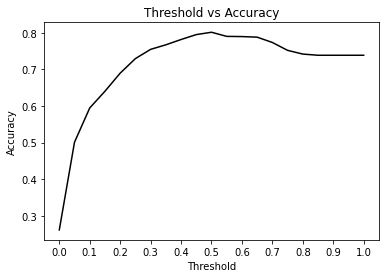

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

# plt.savefig('04_threshold_accuracy.svg')

plt.show()

In [ ]:
#Lets check accuracy for the small model
churn_small = y_pred_small >= 0.5
(churn_small == y_val).mean()

0.7672043010752688

In [ ]:
accuracy_score(y_val, churn_small)

0.7672043010752688

In [ ]:
#To provide some context to the validation dataset accuracy, lets create a dummy baseline that only predicts "False". The reason behind this is that majority of the examples in our churn dataset belong to class 0 (False). Thus, if an algorithm classifies only these examples correctly, it may have high accuracy.
size_val = len(y_val)
baseline = np.repeat(False, size_val)
baseline

array([False, False, False, ..., False, False, False])

In [ ]:
#Check the accuracy of dummy baseline. Note that the accuracy of the dummy baseline where we only have False (0) predicted labels for all examples in dataset, is only slighltly higher than our trained model. Thus, accuracy may not tell us the whole story.
accuracy_score(baseline, y_val)

0.7387096774193549

Confusion table

In [ ]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum() #GOOD: Our prediction is above or eqial to 0.5 and actual label = 1
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum() #BAD: Our prediction is above or eqial to 0.5 and actual label = 0
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum() #BAD: Our prediction is below 0.5 and actual label = 1 
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum() #GOOD: Our prediction is below 0.5 and actual label = 0

In [ ]:
confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[1202,  172],
       [ 197,  289]])

In [ ]:
confusion_table / confusion_table.sum() #65% -> True Negatives, 15% -> True Positives

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

Precision and Recall (Calcualted based on confusion table)

In [ ]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6268980477223427, 0.5946502057613169)

ROC and AUC (We calculated Confusion Table and Precision/Recall based on one threshold. ROC/AUC summarize the performance of the classifier for all possible thresholds): TPR and FPR

In [ ]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [ ]:
scores[:10]

[(0.0, 486, 1374, 0, 0),
 (0.01, 483, 1190, 3, 184),
 (0.02, 481, 1074, 5, 300),
 (0.03, 478, 1011, 8, 363),
 (0.04, 478, 970, 8, 404),
 (0.05, 475, 917, 11, 457),
 (0.06, 474, 879, 12, 495),
 (0.07, 469, 837, 17, 537),
 (0.08, 469, 799, 17, 575),
 (0.09, 462, 764, 24, 610)]

In [ ]:
df_scores[::10] #Select every 10th row of the dataframe

,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [ ]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn) #True Positive Rate
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn) #False Positive Rate

In [ ]:
df_scores[::10] #Notice that we are calculating TPR and FPR at all thresholds

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


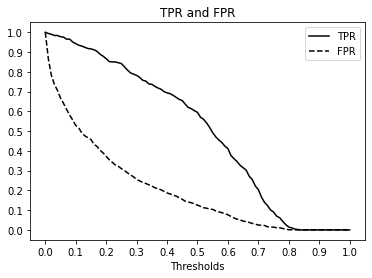

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

Random baseline

In [ ]:
#This code was written previously (see above) and now just encapsulated in a function
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum() #Predicted to be above/equl to the threshold and positive in the dataset
        fp = ((y_pred >= t) & (y_val == 0)).sum() #Predicted to be above/equal to the threshold but negative in the dataset
        fn = ((y_pred < t) & (y_val == 1)).sum() #Predicted to be below the threshold but positive in the dataset
        tn = ((y_pred < t) & (y_val == 0)).sum() #Predicted to be below the threshold and negative in the dataset

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [ ]:
np.random.seed(1) #Fix the random seed for reproducibility.
y_rand = np.random.uniform(0, 1, size=len(y_val)) #Generate an array with random numbers between 0 and 1. We pretend that y_rand contains the predictions for our model
df_rand = tpr_fpr_dataframe(y_val, y_rand) #Call the function tpr_fpr_dataframe()
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


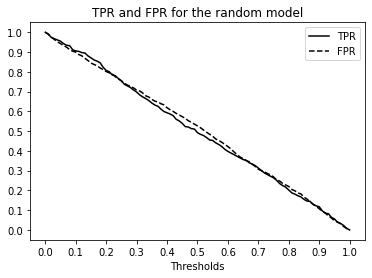

In [ ]:

plt.figure(figsize=(6, 4))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')

#plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

Ideal baseline

In [ ]:
#The ideal model always makes correct decisions
num_neg = (y_val == 0).sum() #Calculate the number of negative examples in the dataset.
num_pos = (y_val == 1).sum() ##Calculate the number of positive examples in the dataset.

y_ideal = np.repeat([0, 1], [num_neg, num_pos]) #Generate an array that first repeats 0s num_neg number of times, followed by 1s repeated num_pos number of times.
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos) #Generate the predictions of the "model": numbers that grow from 0 in the first cell to 1 in the last.

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal) #Call tpr_fpr_dataframe()
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,486,1188,0,186,1.000000,0.864629
20,0.2,486,1002,0,372,1.000000,0.729258
30,0.3,486,816,0,558,1.000000,0.593886
40,0.4,486,630,0,744,1.000000,0.458515
50,0.5,486,444,0,930,1.000000,0.323144
60,0.6,486,258,0,1116,1.000000,0.187773
70,0.7,486,72,0,1302,1.000000,0.052402
80,0.8,372,0,114,1374,0.765432,0.000000
90,0.9,186,0,300,1374,0.382716,0.000000


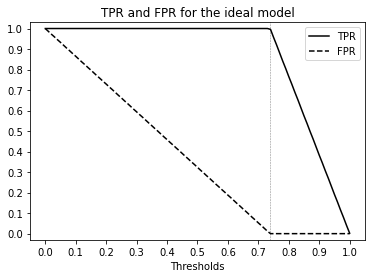

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(df_ideal.threshold, df_ideal.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')

# plt.savefig('04_fpr_tpr_plot_ideal.svg')

plt.show()

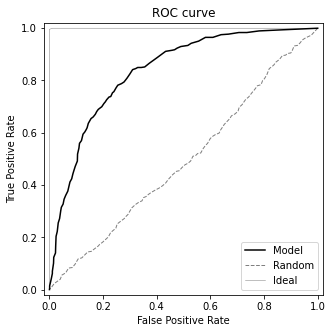

In [ ]:
#ROC curve: We are plotting the ROC curve (combination of TPR/FPR) for each of the three models.
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model') #Our model
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1,
         linestyle='dashed', alpha=0.5, label='Random') #Random model
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5,
         linestyle='solid', alpha=0.5, label='Ideal')  #Ideal model

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve_with_baselines.svg')

plt.show()

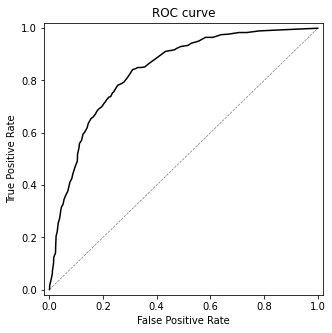

In [ ]:
#We already know what the ideal model looks like. We can also draw a line in the middle for reference in addition to our model
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black') #Our model
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5) #Dashed line

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve.svg')

plt.show()

Scikit-Learn for plotting the ROC curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

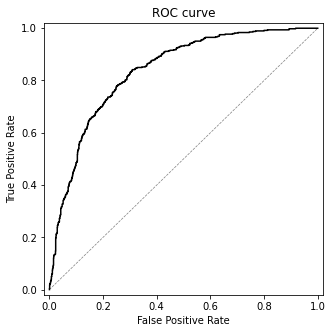

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

AUC: Area under the ROC curve

In [ ]:
df_scores_small = tpr_fpr_dataframe(y_val, y_pred_small) #Small model

In [ ]:
auc(df_scores.fpr, df_scores.tpr)

0.8359001084215382

In [ ]:
auc(df_scores_small.fpr, df_scores_small.tpr)

0.8125475467380692

Comparing multiple models with ROC curves

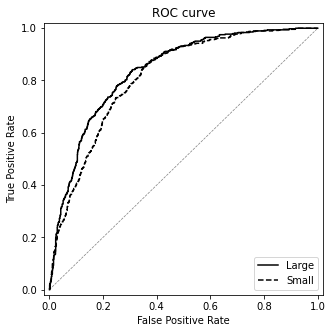

In [ ]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred) #Larger model is better
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5, 5))

plt.plot(fpr_large, tpr_large, color='black', linestyle='solid', label='Large')
plt.plot(fpr_small, tpr_small, color='black', linestyle='dashed', label='Small')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')
plt.legend(loc='lower right')

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score #We don't need to compute the ROC curve. We can use ths=is Scikit-learn shortcut to calcualte the ROC AUC Score directly

In [ ]:
roc_auc_score(y_val, y_pred) #Larger model is better

0.8363366398907399

In [ ]:
roc_auc_score(y_val, y_pred_small)

0.8129354083179088

ROC-AUC Score via Probability

In [ ]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.8356

**Parameter Tuning**

K-fold cross-validation

In [ ]:
def train(df, y): #(df = training dataset, y = training labels)
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False) #Dict Vectorizer
    dv.fit(cat)

    X = dv.transform(cat) #X contains data transformed by Dict Vectorizer

    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    return dv, model #Return Dict Vectorizer and trained model


def predict(df, dv, model): #(df = validation dataset, dv = Dict Vectorizer)
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1) #Split dataset in 10 folds

In [ ]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full): #Training dataset is split into 10 folds
    df_train = df_train_full.iloc[train_idx] #Training fold is saved in df_train
    y_train = df_train.churn.values #Training labels are saved in y_train

    df_val = df_train_full.iloc[val_idx] #Validation fold is saved in df_val
    y_val = df_val.churn.values #y_val are the validation dataset labels

    dv, model = train(df_train, y_train) #Call train() with training data and labels. Dict Vectorizer and trained model are returned
    y_pred = predict(df_val, dv, model) #Call predict() with validation data, Dict Vectorizer and model returned by the train() function

    rocauc = roc_auc_score(y_val, y_pred) #Calculate ROC-AUC score based on the validation dataset labels and predictions
    aucs.append(rocauc) #Append the AUC-ROC score for training and validation folds in the current iteration

In [ ]:
np.array(aucs).round(3)

array([0.849, 0.841, 0.859, 0.833, 0.824, 0.842, 0.844, 0.822, 0.845,
       0.861])

In [ ]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs))) #Mean and Standard Deviation of ROC-AUC scores

auc = 0.842 ± 0.012


**Finding best parameters**

Tuning Regularization ("C" parameter)

In [ ]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

In [ ]:
#Find best C
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.008
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


In [ ]:
#We select C = 0.5 and retrain training + validation dataset so that we can make final predictions on the test dataset
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model) #Make predictions based on test dataset

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858
